# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Load the data from CSV
data = pd.read_csv("projectData.csv")

data['PctTasksCompleted'] = data['TaskCountCompleted'] / data['TotalTaskCount']

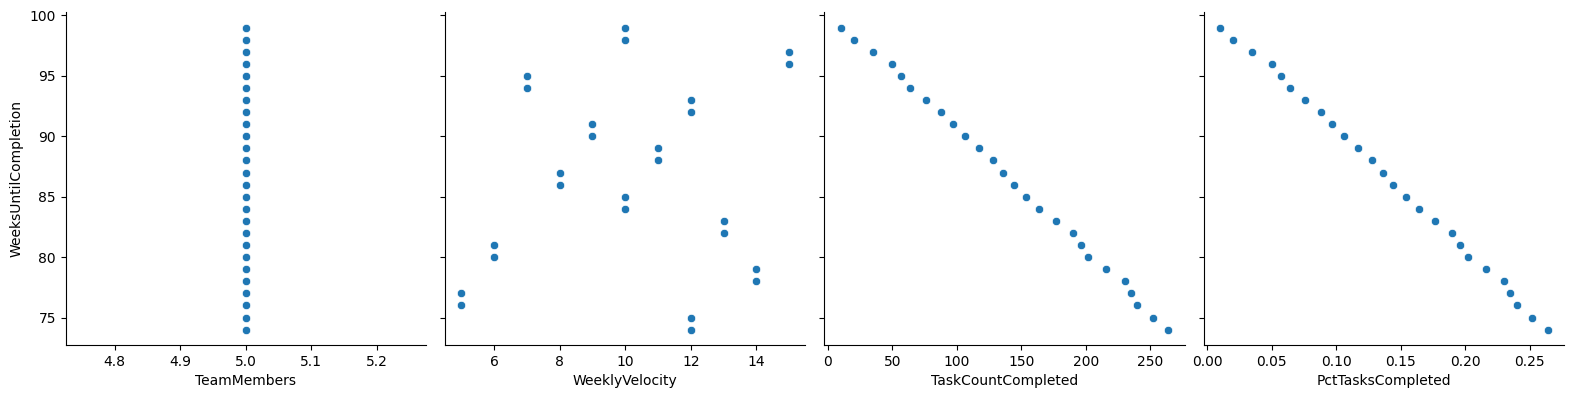

In [3]:
sns.pairplot(data, x_vars=['TeamMembers', 'WeeklyVelocity', 'TaskCountCompleted', 'PctTasksCompleted'], y_vars='WeeksUntilCompletion', size=4, aspect=1, kind='scatter')
plt.show()

Let's inspect the various aspects of our dataframe

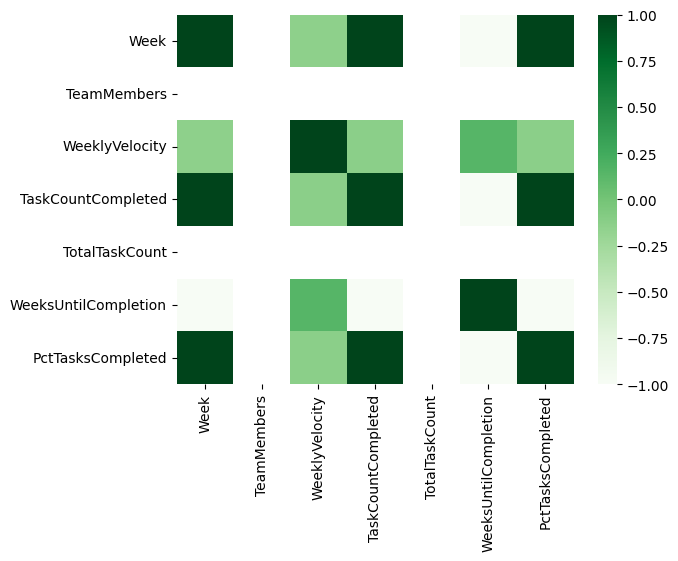

In [4]:
sns.heatmap(data.corr(), cmap="Greens")
plt.show()

In [5]:
# Selecting the data as X and Y to generate the model.
X = data[['TeamMembers', 'WeeklyVelocity', 'TaskCountCompleted', 'PctTasksCompleted']]
y = data['WeeksUntilCompletion']

# Splitting the data for training and testing with the test size.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
lastrow = data.iloc[-1]

# Predicting with new data
new_data = pd.DataFrame({
    'TeamMembers': [5],
    'WeeklyVelocity': [10],
    'TaskCountCompleted': lastrow['TaskCountCompleted'],
    'PctTasksCompleted': lastrow['PctTasksCompleted']
})

predicted_weeks_until_completion = model.predict(new_data)[0]

# Calculating the completion date based on the prediction
current_date = datetime.now()
completion_date = current_date + timedelta(weeks=int(predicted_weeks_until_completion))

print(f"Predicted Weeks Until Completion: {predicted_weeks_until_completion:.2f} weeks")
print(f"Predicted Completion Date: {completion_date.strftime('%Y-%m-%d')}")

Predicted Weeks Until Completion: 74.17 weeks
Predicted Completion Date: 2025-08-01
